## Set up Environment

In [1]:
import pandas as pd


## Load Dataset

In [2]:
df = pd.read_csv(r"/Users/dejicuomu/Desktop/boilerplate-demographic-data-analyzer/adult.data.csv")

In [3]:
df.shape

(32561, 15)

In [4]:
type(df)

pandas.core.frame.DataFrame

## Exploring Data

In [5]:
# 1. Count of individuals in each race
race_count = df['race'].value_counts()
print("Number of each race:\n", race_count)

Number of each race:
 White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


In [6]:
# 2.What is the average age of men?
average_age_men = df[df['sex'] == 'Male']['age'].mean()
print("Average age of men:", average_age_men)


Average age of men: 39.43354749885268


In [7]:
# 3. Percentage of people with Bachelors degrees
percentage_bachelors = (df[df['education'] == 'Bachelors'].shape[0] / df.shape[0]) * 100

print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")


Percentage with Bachelors degrees: 16.44605509658794%


In [8]:
# 4. Percentage of people with advanced education making >50K

# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
# What percentage of people without advanced education make more than 50K?
higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
higher_education_rich = higher_education[higher_education['salary'] == '>50K']
percentage_higher_education_rich = (higher_education_rich.shape[0] / higher_education.shape[0]) * 100

print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")


Percentage with higher education that earn >50K:        age         workclass  fnlwgt  education  education-num  \
8       31           Private   45781    Masters             14   
9       42           Private  159449  Bachelors             13   
11      30         State-gov  141297  Bachelors             13   
19      43  Self-emp-not-inc  292175    Masters             14   
20      40           Private  193524  Doctorate             16   
...    ...               ...     ...        ...            ...   
32533   54           Private  337992  Bachelors             13   
32536   34           Private  160216  Bachelors             13   
32538   38           Private  139180  Bachelors             13   
32539   71                 ?  287372  Doctorate             16   
32554   53           Private  321865    Masters             14   

           marital-status       occupation   relationship                race  \
8           Never-married   Prof-specialty  Not-in-family               White

In [9]:
# 5. Percentage of people without advanced education making >50K
lower_education = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
lower_education_rich = lower_education[lower_education['salary'] == '>50K']
percentage_lower_education_rich = (lower_education_rich.shape[0] / lower_education.shape[0]) * 100

print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")


Percentage without higher education that earn >50K:        age         workclass  fnlwgt     education  education-num  \
7       52  Self-emp-not-inc  209642       HS-grad              9   
10      37           Private  280464  Some-college             10   
14      40           Private  121772     Assoc-voc             11   
27      54                 ?  180211  Some-college             10   
38      31           Private   84154  Some-college             10   
...    ...               ...     ...           ...            ...   
32518   57         Local-gov  110417       HS-grad              9   
32519   46           Private  364548  Some-college             10   
32545   39         Local-gov  111499    Assoc-acdm             12   
32557   40           Private  154374       HS-grad              9   
32560   52      Self-emp-inc  287927       HS-grad              9   

           marital-status         occupation relationship                race  \
7      Married-civ-spouse    Exec-mana

In [10]:
# 6. Minimum hours of work per week
min_work_hours = df['hours-per-week'].min()

print(f"Min work time: {min_work_hours} hours/week")


Min work time: 1 hours/week


In [11]:
# 7. Percentage of those working minimum hours and making >50K
rich_percentage = df[(df['hours-per-week'] == min_work_hours) & (df['salary'] == '>50K')].shape[0]

print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")


Percentage of rich among those who work fewest hours: 2%


In [12]:
# 8. Country with the highest percentage of people making >50K
highest_earning_country = df[df['salary'] == '>50K']['native-country'].value_counts().idxmax()
highest_earning_country_percentage = (df[(df['native-country'] == highest_earning_country) & (df['salary'] == '>50K')].shape[0] / df[df['native-country'] == highest_earning_country].shape[0]) * 100

print("Country with highest percentage of rich:", highest_earning_country)

print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")


Country with highest percentage of rich: United-States
Highest percentage of rich people in country: 24.583476174151524%


In [13]:
# 9. Top occupations in India for individuals making >50K
top_IN_occupation = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]['occupation'].value_counts()

print("Top occupations in India:", top_IN_occupation)

Top occupations in India: Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Visualizing Data

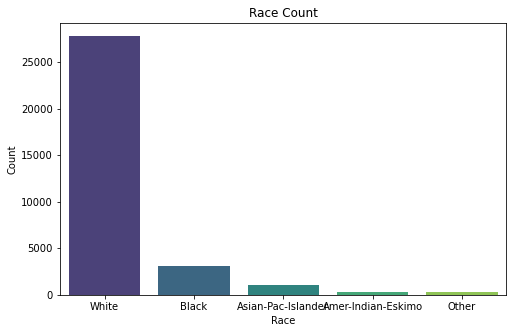

In [15]:
    # Visualization 1: Race Count

    plt.figure(figsize=(8, 5))
    sns.barplot(x=race_count.index, y=race_count.values, palette="viridis")
    plt.title('Race Count')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.show()

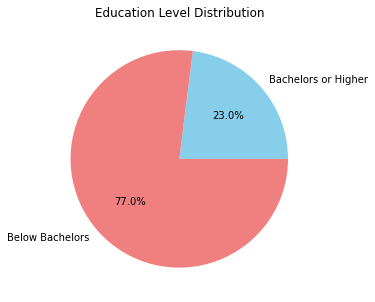

In [16]:
# Visualization 2: Education Level Distribution
labels = ['Bachelors or Higher', 'Below Bachelors']
sizes = [df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])].shape[0], df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])].shape[0]]
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Education Level Distribution')
plt.show()